In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Mohan\AppData\Local\Temp\ipykernel_10632\695354703.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
df=pd.read_csv("updated.csv")

C:\Users\Mohan\AppData\Local\Temp\ipykernel_10632\1887467425.py:1: DtypeWarning: Columns (1,15,16,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("updated.csv")


In [3]:
df.head()

,_Date,Order_ID,Invoice,Portal,Style,SKU,Qty,Unit_Price,Currency,conversion_rate,...,Channel_Party_GSTIN,Billing_Party_Code,Tax_Verification,GST_Registration_Type,Customer ID,Design_No_,Stock,Category,Size,Color
0,02-04-2022,404-9365790-8203566,IN-27,Amazon TBS,JNE3686,JNE3686-TU-XXL,1,424.76,INR,1.0,...,24AAKFT0982E1Z6,prabhat,1,Consumer,7305,JNE3686,5,TUNIC,XXL,White
1,02-04-2022,402-0670618-4837911,IN-35,Amazon TBS,JNE3670,JNE3670-TU-XS,1,380.00,INR,1.0,...,24AAKFT0982E1Z6,prabhat,1,Consumer,43100,JNE3670,5,TUNIC,XS,White
2,02-04-2022,403-0895877-7397109,IN-46,Amazon TBS,JNE3797,JNE3797-KR-L,1,680.96,INR,1.0,...,24AAKFT0982E1Z6,prabhat,1,Consumer,56765,JNE3797,5,KURTA,L,Green
3,02-04-2022,171-0515508-9326733,IN-119,Amazon TBS,J0117,J0117-TP-XXXL,1,475.24,INR,1.0,...,24AAKFT0982E1Z6,prabhat,1,Consumer,95449,J0117,48,TOP,XXXL,White
4,02-04-2022,402-3010573-2461150,IN-128,Amazon TBS,SET110,SET110-KR-PP-S,1,694.28,INR,1.0,...,24AAKFT0982E1Z6,prabhat,1,Consumer,26758,SET110,37,KURTA SET,S,Black


In [4]:
df=df[['Invoice', 'SKU','Category', 'Qty', '_Date' ,
       'Unit_Price', 'Customer ID', 'State']]

In [5]:
df.describe()

,Qty,Unit_Price,Customer ID
count,247828.000000,247828.000000,247828.000000
mean,1.160450,617.416160,40143.970124
std,1.238537,413.523608,30921.145336
min,1.000000,0.000000,0.000000
25%,1.000000,370.480000,9799.750000
50%,1.000000,629.740000,37302.000000
75%,1.000000,890.480000,63018.000000
max,100.000000,2945.540000,100556.000000


Exploratory data analysis

Description Name

In [6]:

Category_df=df['Category'].value_counts().reset_index()
Category_df.head()


,Category,count
0,KURTA,111430
1,KURTA SET,46744
2,DRESS,27295
3,TOP,23801
4,SET,19343


<Axes: xlabel='count', ylabel='Category'>

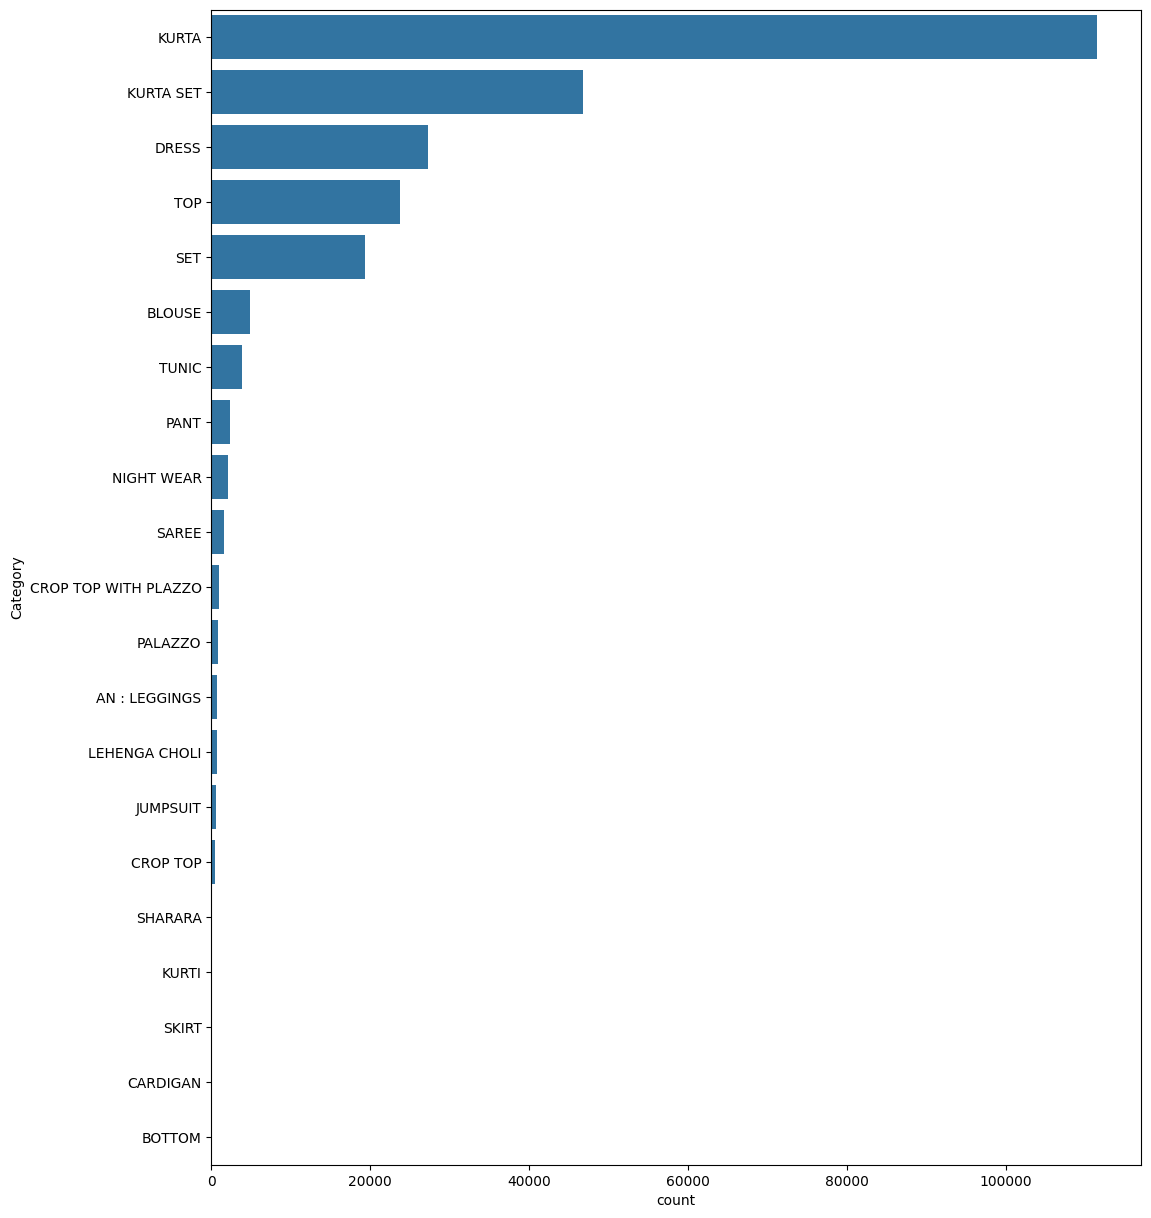

In [7]:
plt.figure(figsize=(12,15))
sns.barplot(x='count',y='Category',data=Category_df,)

In [8]:
# Country Name

state_df=df['State'].value_counts().reset_index()
state_df.head()

,State,count
0,Gujarat,68959
1,Maharashtra,30407
2,Karnataka,20162
3,Tamil Nadu,15063
4,Uttar Pradesh,14933


In [9]:
SKU_df=df['SKU'].value_counts().reset_index()
SKU_df.head()  # top 5 stock name

,SKU,count
0,J0341-DR-M,1269
1,J0341-DR-L,1197
2,JNE3797-KR-L,1137
3,JNE3797-KR-M,1129
4,J0341-DR-S,1034


<Axes: xlabel='count', ylabel='SKU'>

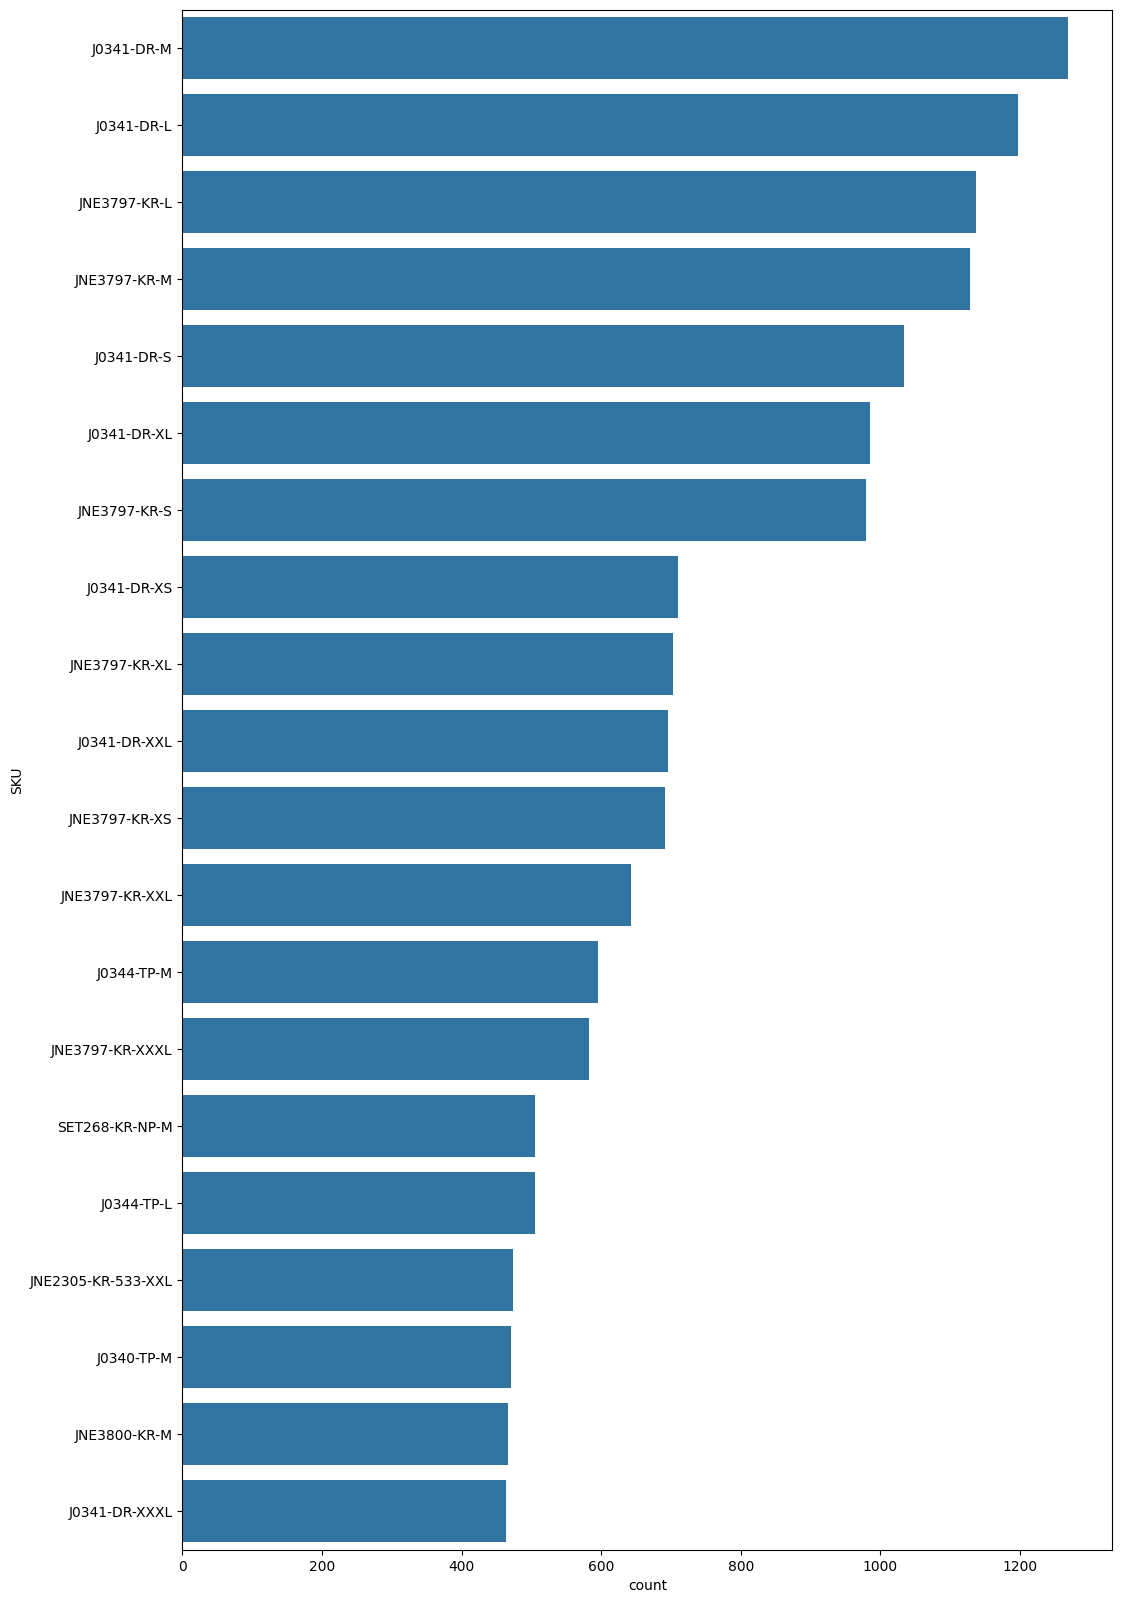

In [10]:
plt.figure(figsize=(12,20))
sns.barplot(x='count',y='SKU',data=SKU_df[:20])

In [11]:
SKU_df=df['SKU'].value_counts().reset_index()
SKU_df.head()  # top 5 stock name

,SKU,count
0,J0341-DR-M,1269
1,J0341-DR-L,1197
2,JNE3797-KR-L,1137
3,JNE3797-KR-M,1129
4,J0341-DR-S,1034


<Axes: xlabel='count', ylabel='State'>

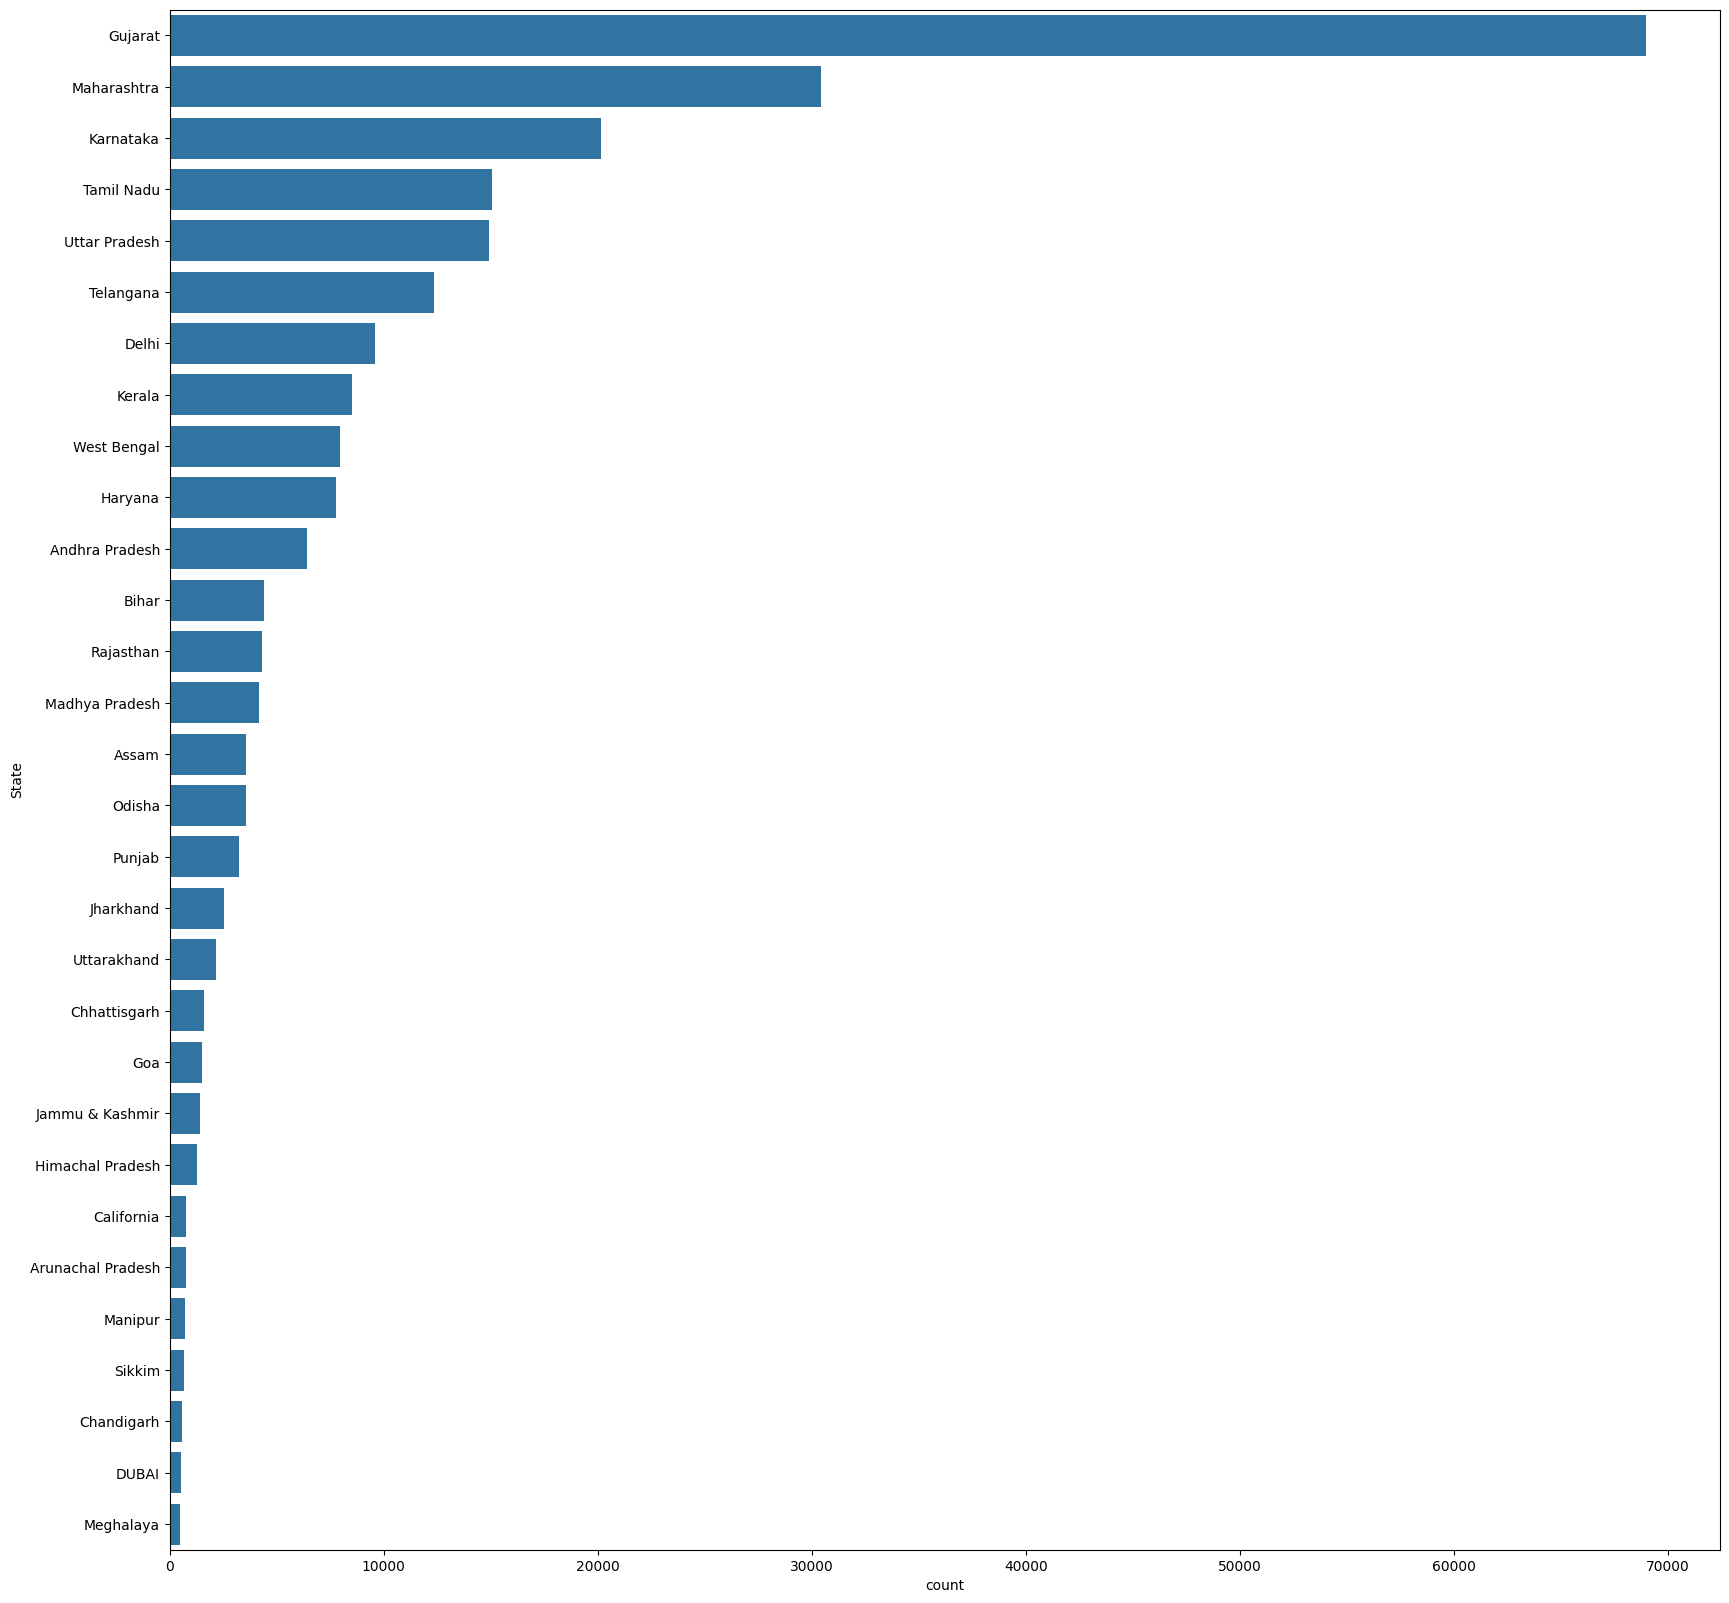

In [12]:
plt.figure(figsize=(20,20))
sns.barplot(x='count',y='State',data=state_df[:30])

<Axes: xlabel='count', ylabel='State'>

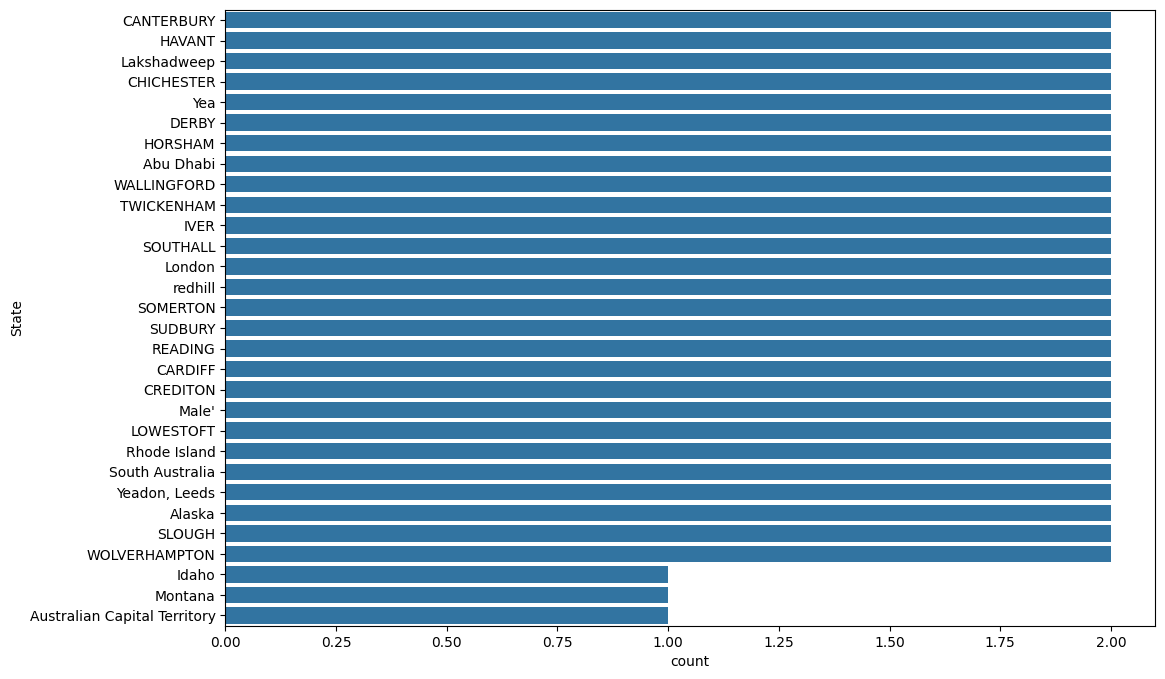

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x='count',y='State',data=state_df[-30:])

#distribution of quantity

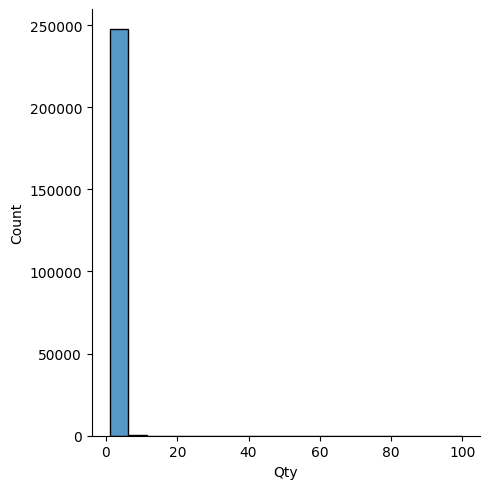

In [14]:
sns.displot(df['Qty'])

C:\Users\Mohan\AppData\Local\Temp\ipykernel_10632\1232808358.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Qty']), color="r")


<Axes: title={'center': 'log distribution of Quantity'}, xlabel='Qty', ylabel='Density'>

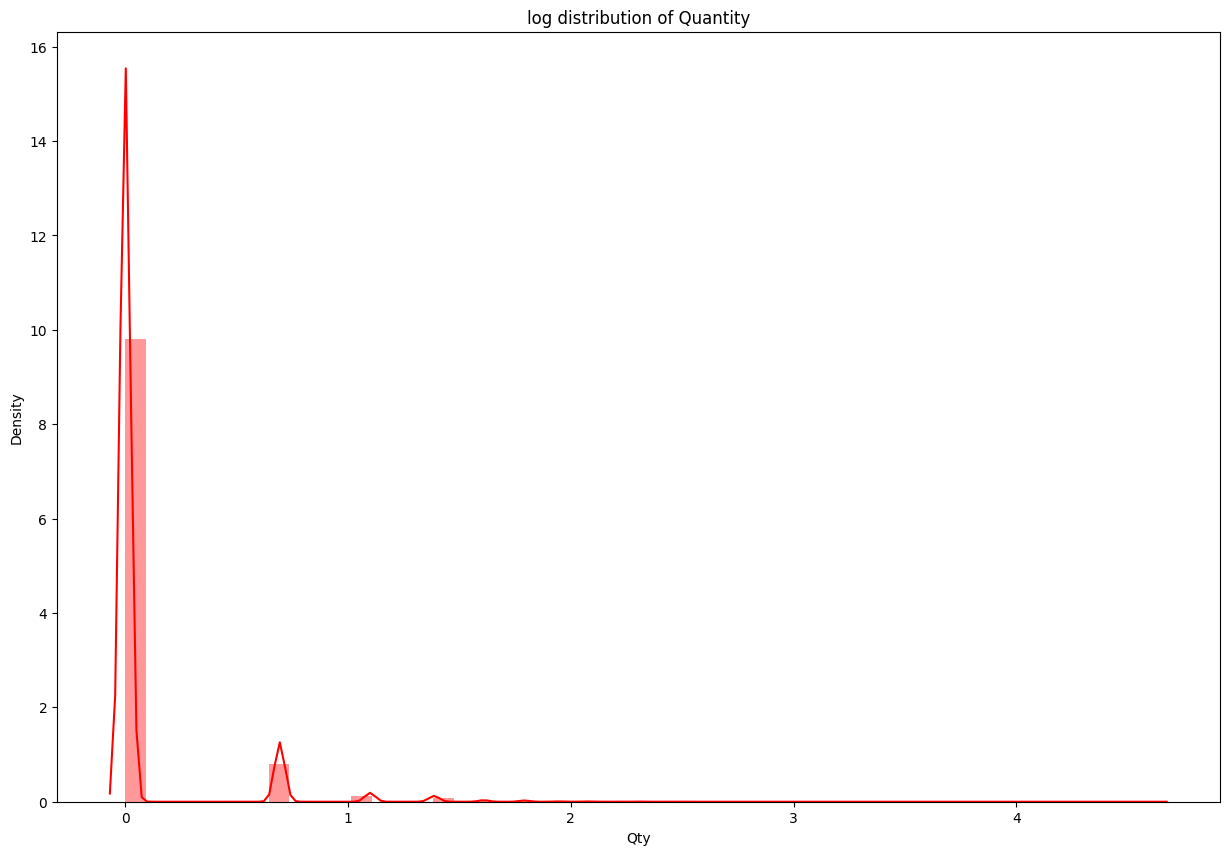

In [15]:

#transforming skewed distribution to symmetrical distribution
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Qty']), color="r")


In [16]:
['Invoice', 'SKU','Category', 'Qty', '_Date' ,
       'Unit_Price', 'Customer ID', 'State']

['Invoice',
 'SKU',
 'Category',
 'Qty',
 '_Date',
 'Unit_Price',
 'Customer ID',
 'State']

C:\Users\Mohan\AppData\Local\Temp\ipykernel_10632\3513259765.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Unit_Price'],color='r')


<Axes: title={'center': 'UnitPrice Distribution'}, xlabel='Unit_Price', ylabel='Density'>

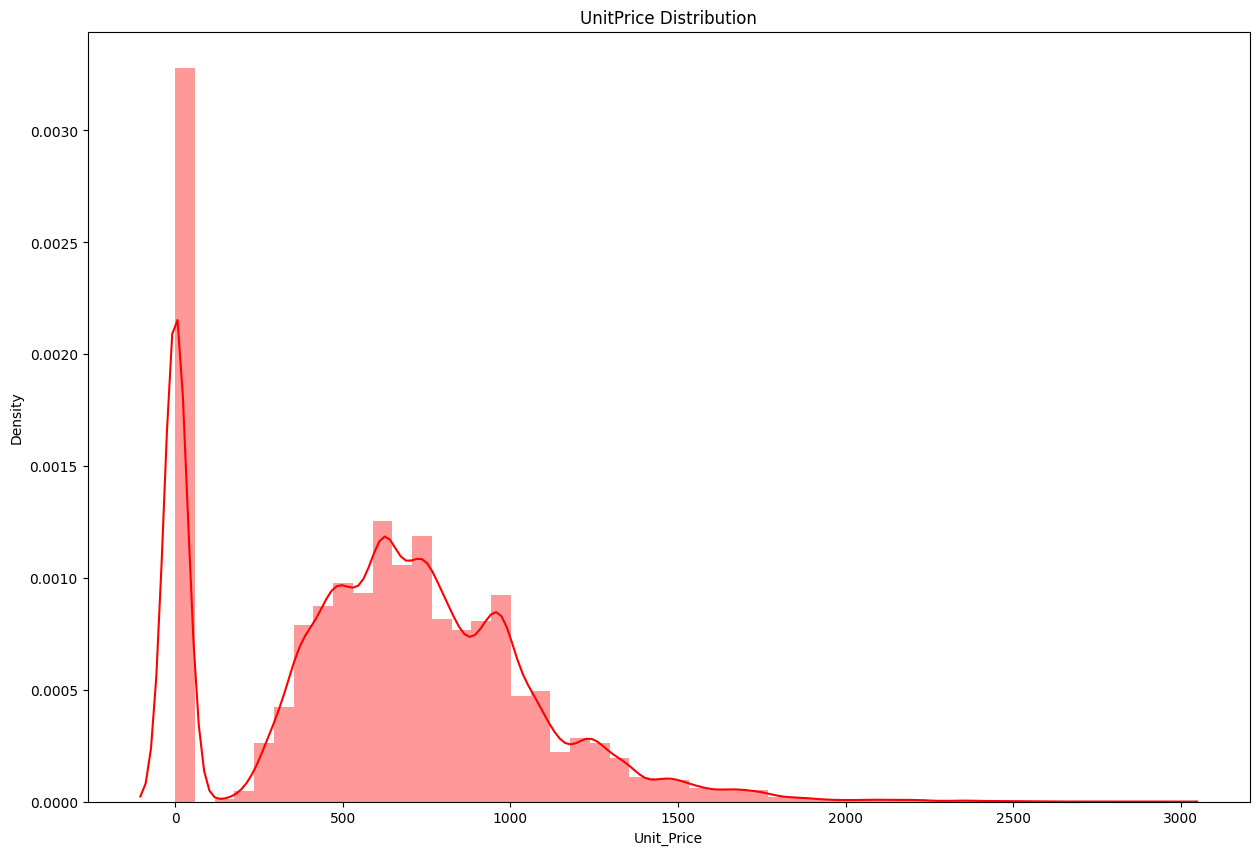

In [17]:
# distribution of unit price

plt.figure(figsize=(15,10))
plt.title("UnitPrice Distribution")
sns.distplot(df['Unit_Price'],color='r')

### feature engineering

In [18]:
df["_Date"] =pd.to_datetime(df["_Date"],format="%d-%m-%Y")

In [19]:
#Creating a new features from Invoicedate
df['Month']=df['_Date'].dt.month_name()
df['Day']=df['_Date'].dt.day_name()

In [20]:
#Creating a new feature TotalAmount from product of Quantity and Unitprice
df['TotalAmount']=df['Qty']*df['Unit_Price']

In [21]:
df.head()

,Invoice,SKU,Category,Qty,_Date,Unit_Price,Customer ID,State,Month,Day,TotalAmount
0,IN-27,JNE3686-TU-XXL,TUNIC,1,2022-04-02,424.76,7305,Gujarat,April,Saturday,424.76
1,IN-35,JNE3670-TU-XS,TUNIC,1,2022-04-02,380.00,43100,Gujarat,April,Saturday,380.00
2,IN-46,JNE3797-KR-L,KURTA,1,2022-04-02,680.96,56765,Gujarat,April,Saturday,680.96
3,IN-119,J0117-TP-XXXL,TOP,1,2022-04-02,475.24,95449,Gujarat,April,Saturday,475.24
4,IN-128,SET110-KR-PP-S,KURTA SET,1,2022-04-02,694.28,26758,Gujarat,April,Saturday,694.28


C:\Users\Mohan\AppData\Local\Temp\ipykernel_10632\3626720425.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalAmount'],color="r");


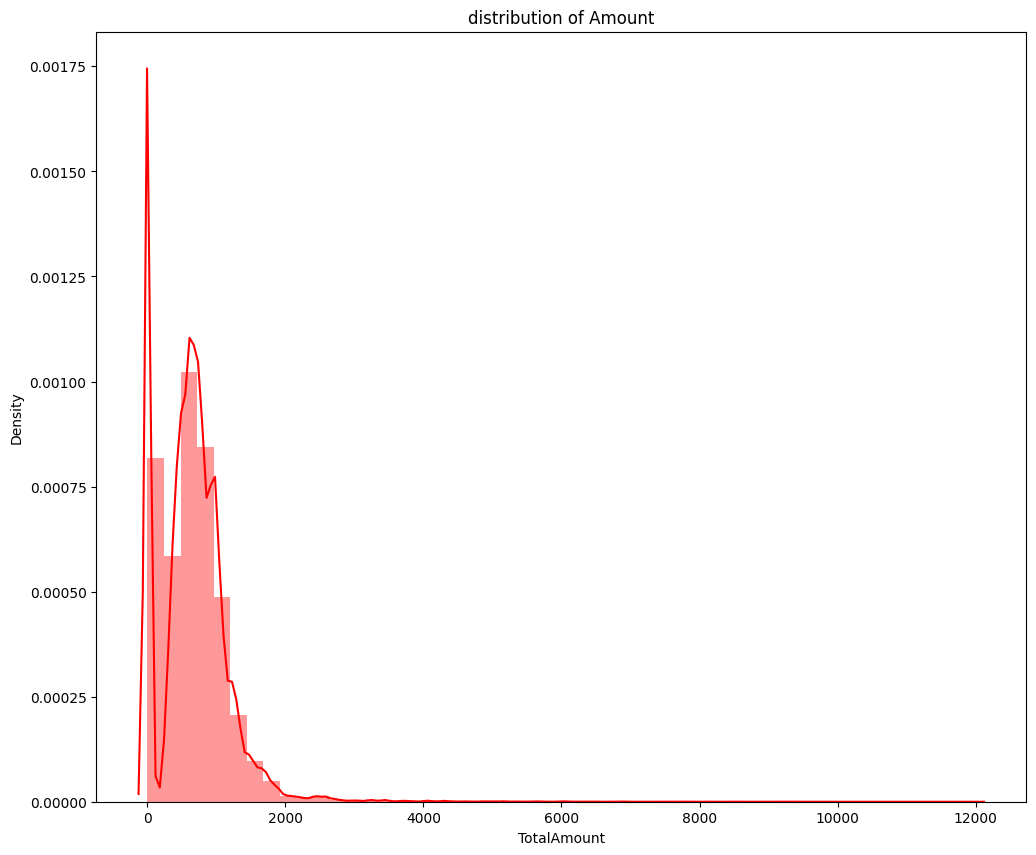

In [22]:
# Distribution of total amount

#checking distribution for Totalamount
plt.figure(figsize=(12,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="r");

In [23]:
# Months

#creating month dataframe
month_df=df['Month'].value_counts().reset_index()
# month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
# month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month,count
0,April,88426
1,May,80824
2,June,78578


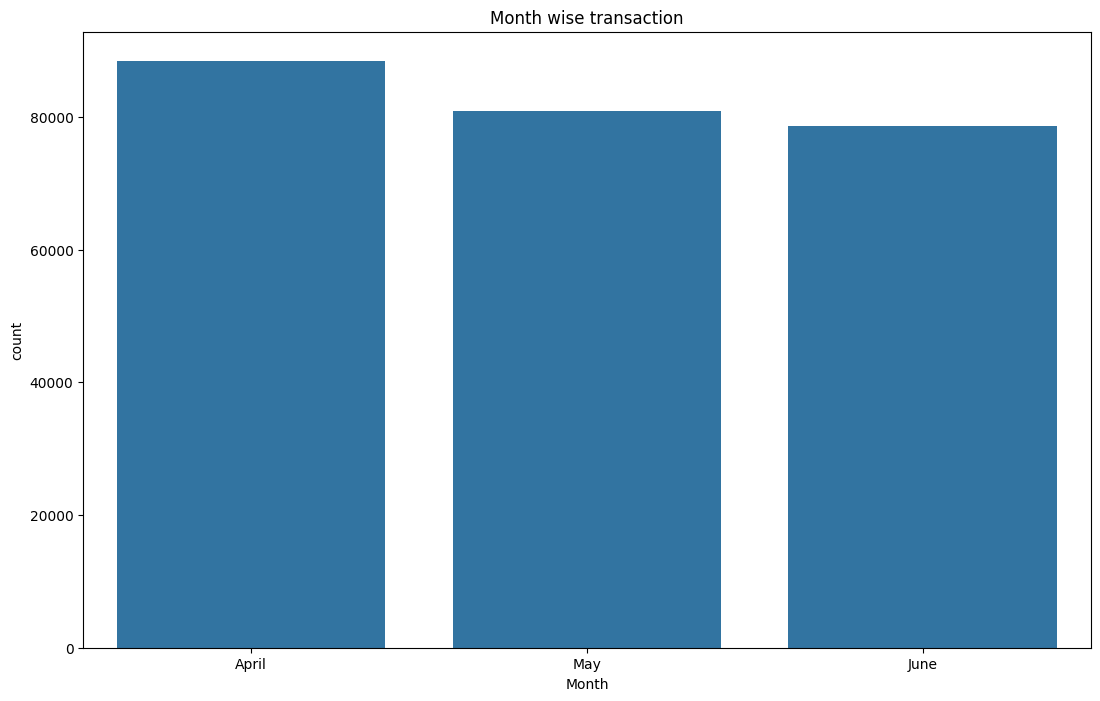

In [24]:
#plotting for month
plt.figure(figsize=(13,8))
plt.title('Month wise transaction')
sns.barplot(x='Month',y='count',data=month_df);

In [25]:
# Days

#creating day dataframe
day_df=df['Day'].value_counts().reset_index()
day_df

,Day,count
0,Monday,45931
1,Saturday,37442
2,Tuesday,37224
3,Friday,33697
4,Thursday,33553
5,Sunday,32247
6,Wednesday,27734


C:\Users\Mohan\AppData\Local\Temp\ipykernel_10632\3314798973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day',y='count',data=day_df, palette='spring_r');


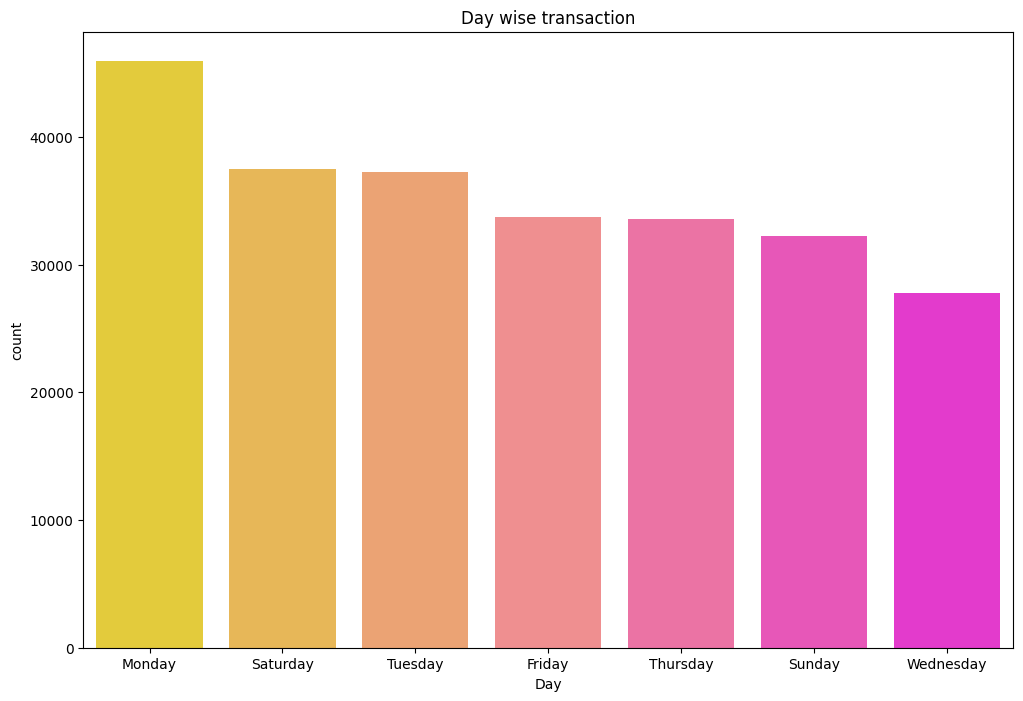

In [26]:
#plotting for days
plt.figure(figsize=(12,8))
plt.title('Day wise transaction')
sns.barplot(x='Day',y='count',data=day_df, palette='spring_r');

# Create the RFM model (Recency, Frequency,Monetary value)

### rfm analysis will help the business to segment their customer base into different homogeneous groups so that they can engage with each group with different  targeted marketing strategies

In [27]:
last_date = df['_Date'].max()
print("Last date purchasing : ", last_date)

Last date purchasing :  2022-06-28 00:00:00


In [28]:
import datetime as dt
Latest_Date = dt.datetime(2022,6,28)
rfm_df=df.groupby('Customer ID').agg({'_Date': lambda x:(Latest_Date-x.max()).days,'Invoice': lambda x: x.count(),'TotalAmount': lambda x: x.sum()})
rfm_df.rename(columns={'_Date': 'Recency', 
                         'Invoice': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)
rfm_df

,Recency,Frequency,Monetary
Customer ID,,,
0,9,1,1499.11
1,25,1,818.10
2,68,1,973.21
3,81,1,842.86
4,43,1,933.33
...,...,...,...
100552,64,1,277.14
100553,15,1,541.90
100554,75,2,2214.28


In [29]:
#Descriptive Statistics (Recency)

rfm_df.Recency.describe()

count    100535.000000
mean         45.871796
std          26.585263
min           0.000000
25%          21.000000
50%          47.000000
75%          70.000000
max          88.000000
Name: Recency, dtype: float64

C:\Users\Mohan\AppData\Local\Temp\ipykernel_10632\1420845793.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='r');


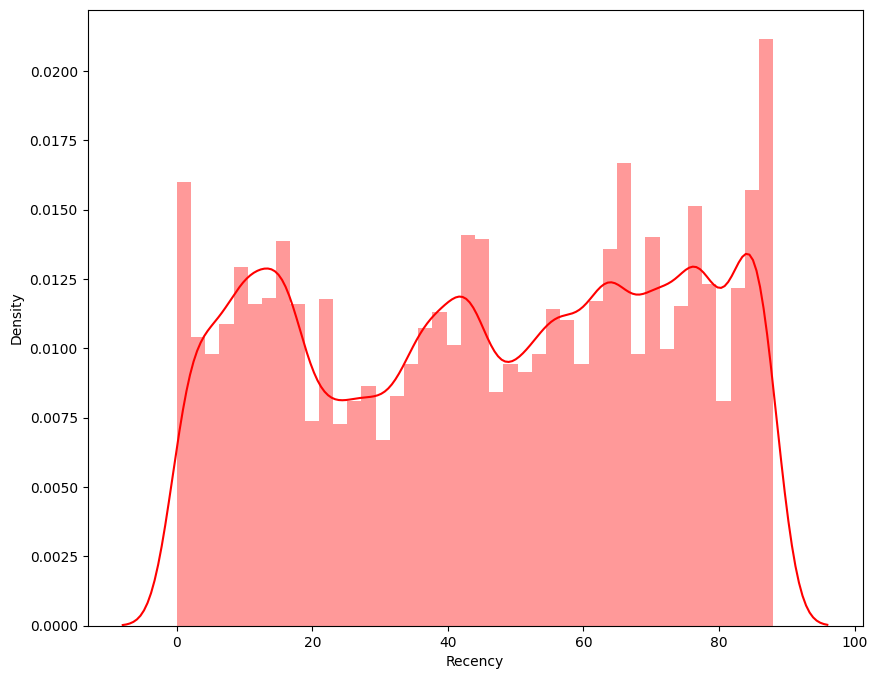

In [30]:
#Recency distribution plot

x = rfm_df['Recency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [31]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count    100535.000000
mean          2.465092
std         143.711127
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       42277.000000
Name: Frequency, dtype: float64

C:\Users\Mohan\AppData\Local\Temp\ipykernel_10632\4207924514.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='r');


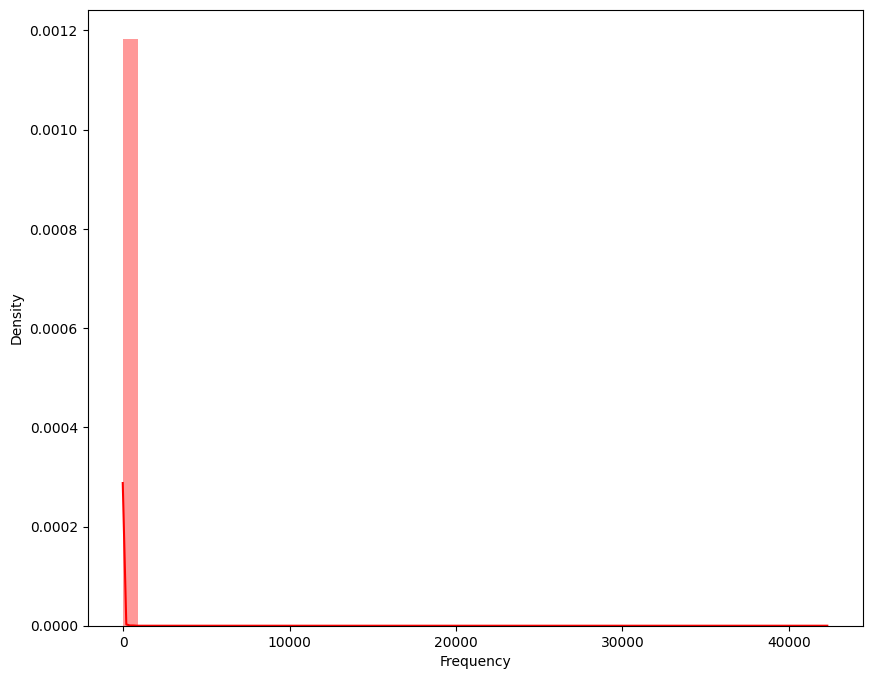

In [32]:
#Frequency distribution plot, taking observations which have frequency less than 1000

x = rfm_df['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r');

In [33]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count    1.005350e+05
mean     1.619456e+03
std      1.309493e+05
min      0.000000e+00
25%      5.847600e+02
50%      8.181000e+02
75%      1.169520e+03
max      4.078205e+07
Name: Monetary, dtype: float64

C:\Users\Mohan\AppData\Local\Temp\ipykernel_10632\756403118.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,color='r')


<Axes: xlabel='Monetary', ylabel='Density'>

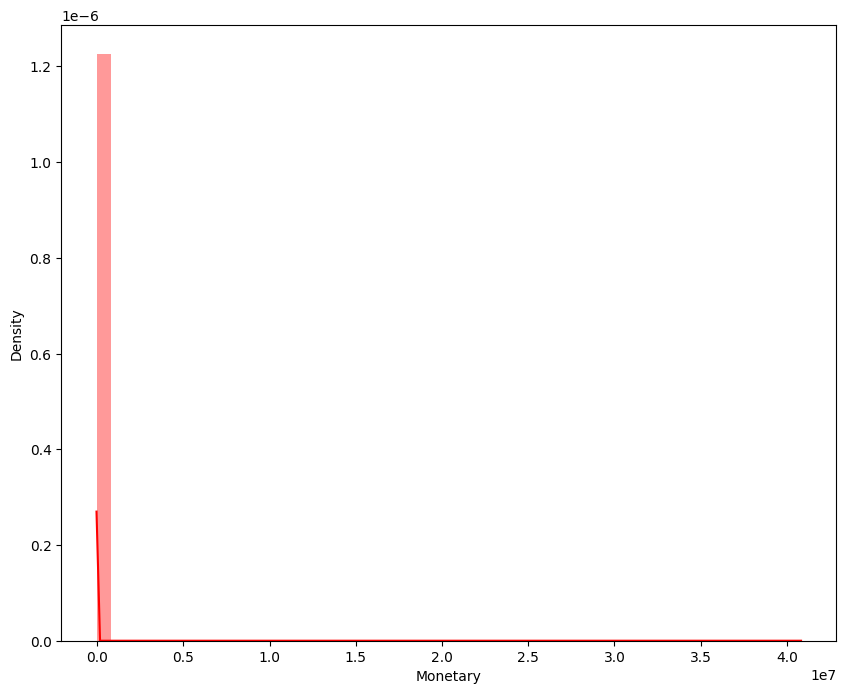

In [34]:
#Monateray distribution plot, taking observations which have monetary value less than 10000

x = rfm_df['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(x,color='r')

### Splitting into four segments using quantiles

In [35]:
#Split into four segments using quantiles
quantiles=rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()


In [36]:
quantiles

{'Recency': {0.25: 21.0, 0.5: 47.0, 0.75: 70.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 584.76, 0.5: 818.1, 0.75: 1169.52}}

In [37]:
#Functions to create R, F and M segments according to quantiles for recency low score is important and for frequency and monetory maximum is important.
#so keeping this in mind we are creating two function to create scores
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [38]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
0,9,1,1499.11,1,4,1
1,25,1,818.10,2,4,3
2,68,1,973.21,3,4,2
3,81,1,842.86,4,4,2
4,43,1,933.33,2,4,2
...,...,...,...,...,...,...
100552,64,1,277.14,3,4,4
100553,15,1,541.90,1,4,4
100554,75,2,2214.28,4,1,1


In [39]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
Customer ID,,,,,,,,
0,9,1,1499.11,1,4,1,141,6
1,25,1,818.10,2,4,3,243,9
2,68,1,973.21,3,4,2,342,9
3,81,1,842.86,4,4,2,442,10
4,43,1,933.33,2,4,2,242,8


In [40]:
# rfm_df.to_csv("rfmupdated.csv")

PermissionError: [Errno 13] Permission denied: 'rfmupdated.csv'

### What are outliers?
### An outlier is an object that deviates significantly from the rest of the objects. 
### They can be caused by measurement or execution error. The analysis of outlier data is referred to as outlier analysis or outlier mining.

In [41]:
Q1 = rfm_df.Monetary.quantile(0.05)
Q3 = rfm_df.Monetary.quantile(0.95)
IQR = Q3 - Q1

rfm_df = rfm_df[(rfm_df.Monetary >= Q1 - 1.5*IQR) & (rfm_df.Monetary <= Q3 + 1.5*IQR)]
print(rfm_df.shape)

Q1 = rfm_df.Recency.quantile(0.05)
Q3 = rfm_df.Recency.quantile(0.95)
IQR = Q3 - Q1

rfm_df = rfm_df[(rfm_df.Recency >= Q1 - 1.5*IQR) & (rfm_df.Recency <= Q3 + 1.5*IQR)]
print(rfm_df.shape)

Q1 = rfm_df.Frequency.quantile(0.05)
Q3 = rfm_df.Frequency.quantile(0.95)
IQR = Q3 - Q1

rfm_df = rfm_df[(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]
print(rfm_df.shape)

(99539, 8)
(99539, 8)
(98710, 8)


In [42]:
#scaling
from sklearn.preprocessing import MinMaxScaler
X = rfm_df[['Monetary', 'Frequency', 'Recency']]
scaler = MinMaxScaler()
rfm_df_scaled = scaler.fit_transform(X)
print(rfm_df.shape)

(98710, 8)


In [43]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetory', 'Frequency', 'Recency']
print(rfm_df_scaled.head())
print(rfm_df.shape)

   Monetory  Frequency   Recency
0  0.241347        0.0  0.102273
1  0.131709        0.0  0.284091
2  0.156681        0.0  0.772727
3  0.135695        0.0  0.920455
4  0.150260        0.0  0.488636
(98710, 8)


In [ ]:
# #model creation
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=3, max_iter=50)

# kmeans.fit(rfm_df_scaled)
# lbs = kmeans.labels_

# print(kmeans.labels_)

In [ ]:
# #wss
# wss = []
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# for num_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
#     kmeans.fit(rfm_df_scaled)
#     wss.append(kmeans.inertia_)
    
# plt.plot(wss)

In [ ]:
# Silhouette Analysis
# silhouette score=𝑝−𝑞/𝑚𝑎𝑥(𝑝,𝑞)
# 𝑝 is the mean distance to the points in the nearest cluster that the data point is not a part of
# 𝑞 is the mean intra-cluster distance to all the points in its own cluster.
# The value of the silhouette score range lies between -1 to 1.
# A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
# # A score closer to -1 indicates that the data point is not similar to the data points in its cluster.
# from sklearn.metrics import silhouette_score
# #silhouette score
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# for num_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
#     kmeans.fit(rfm_df_scaled)
#     cluster_labels = kmeans.labels_
#     silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(rfm_df_scaled)
print(len(kmeans.labels_))
print(len(rfm_df))
lbs =kmeans.labels_
# wcss=within cluster sum of squared distance(inertia)
rfm_df['Cluster_Id'] = lbs
rfm_df.head()

98710
98710


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster_Id
Customer ID,,,,,,,,,
0,9,1,1499.11,1,4,1,141,6,0
1,25,1,818.10,2,4,3,243,9,0
2,68,1,973.21,3,4,2,342,9,1
3,81,1,842.86,4,4,2,442,10,1
4,43,1,933.33,2,4,2,242,8,2


<Axes: xlabel='Cluster_Id', ylabel='Monetary'>

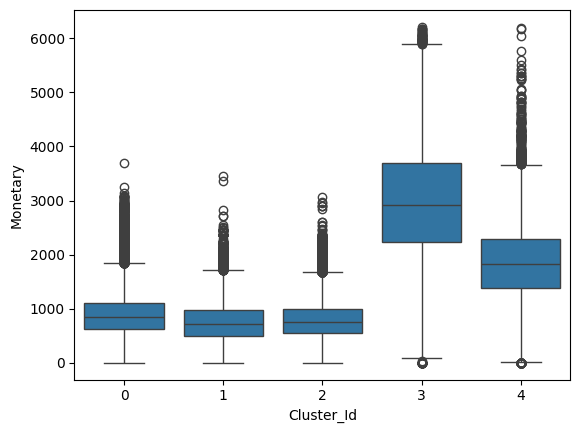

In [46]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_df)


<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

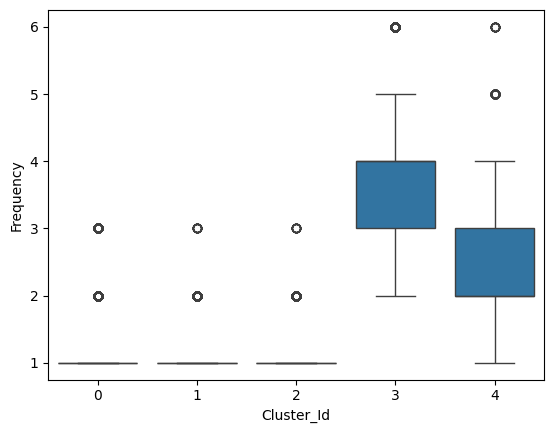

In [47]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_df)


<Axes: xlabel='Cluster_Id', ylabel='Recency'>

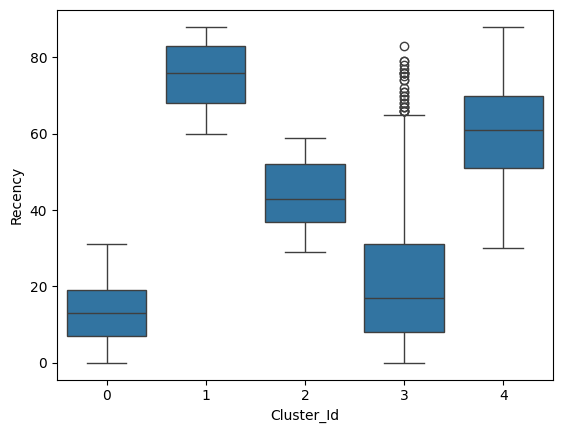

In [48]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_df)

In [52]:
final = rfm_df.groupby("Cluster_Id")[["Recency", "Frequency", "Monetary"]].mean()

final
# rfm_df.columns

,Recency,Frequency,Monetary
Cluster_Id,,,
0,13.505237,1.184300,915.336015
1,75.017139,1.052628,752.105175
2,44.252047,1.075632,795.047345
3,20.116893,3.786190,3012.221852
4,60.441112,2.375787,1884.107177


In [54]:
rfm_df.to_csv("rfmupdated.csv")

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

In [ ]:

#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
print(Log_Tfd_Data.shape)

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(10,8))
sns.distplot(Recency_Plot,color='r')

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(10,8))
sns.distplot(Frequency_Plot,color='r')

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(10,8))
sns.distplot(Monetary_Plot,color='r');

In [ ]:
from sklearn import preprocessing

In [ ]:
rfm_df['Recency'].apply(math.log)